In [14]:
import numpy as np
import matplotlib.pyplot as plt


In [87]:
# function for generating traces
# inputs: number of traces, baseline, snr, magnitude, bins

def simulate_traces(num=100, bins=300, nevents='all', eventT=100, eventlength=50, baseline=0, snr=10, variance=0.2, decay='linear'):
    
    traces=[]
    
    for trace in range(num):
        traces.append(np.random.normal(size=bins))
    
    if nevents == 'all':
        nevents=num
    
    #put in try loop once working
    for event in range(nevents):
        
        magnitude = snr
        decay_factor = 1
        
        for t in range(eventT, eventT+eventlength):
            sig = np.random.normal(loc=magnitude*decay_factor, scale=(snr*variance)*decay_factor)
            traces[event][t] = traces[event][t]+sig
            if decay == 'linear':
                decay_factor = (eventlength - (t-eventT))/eventlength
           
    if baseline != 0:
        for i, trace in enumerate(traces):
            traces[i] = [y+baseline for y in trace]
    
    return traces


In [88]:
def zscore(trace, baseline=100):
    if baseline == 'all':
        baseline = len(trace)
        
    if baseline > len(trace):
        baseline = len(trace)

    mean = np.mean(trace[:baseline])
    sd = np.std(trace[:baseline])
    
    ztrace = [(x-mean)/sd for x in trace]
        
    return ztrace

''

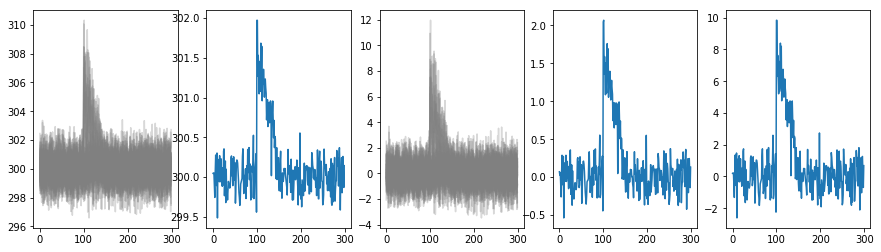

In [93]:
traces = simulate_traces(num=30, baseline=300, nevents=10, snr=5, variance=0.5)



f, ax = plt.subplots(figsize=(15, 4), ncols=5)
for trace in traces:
    ax[0].plot(trace, color='grey', alpha=0.3)
    
ax[1].plot(np.mean(traces, axis=0))


ztraces = []

for trace in traces:
    ztraces.append(zscore(trace))
    ax[2].plot(zscore(trace), color='grey', alpha=0.3)
    
ax[3].plot(np.mean(ztraces, axis=0))

ax[4].plot(zscore(np.mean(traces, axis=0)))
;

[]


In [ ]:
savefile = savefolder + rat + '_behav_summary.csv'
try:
    d = [('Rat',rat),
         ('Total casein licks',len(x.cas['licks'])]

    with open(savefile, 'w', newline='') as file:
        csv_out = csv.writer(file)
        csv_out.writerow(['Parameter', 'Value'])
        for row in d:
            csv_out.writerow(row)

except:
    print('Error making text summary')